$\newcommand{\bmx}{\large \boldsymbol{x} \normalsize}$
$\newcommand{\bmc}{\large \boldsymbol{c} \normalsize}$
$\newcommand{\bmy}{\large \boldsymbol{y} \normalsize}$
$\newcommand{\bmb}{\large \boldsymbol{b} \normalsize}$


# Tecnicas de relacion para resolver sistemas lineales de ecuaciones algebraicas

La idea es encontrar sistemas iterativos mas rapidos para resolver
Es reducir el tamanho de $\rho(T)$.

$$\bmx_{k+1} = T \bmx_k + \bmc .$$

La idea es pensar que en la linea que une a $\bmx_k$ y $\bmx_{k+1}$ podria existir un $\bmy$ que se mejor solution. Es decir

$$ \bmy = (1 - \omega) \bmx_k + \omega \bmx_{k+1}.$$

Hay tres casos:

1. Si $\omega > 1$ se llama sobre-relajacion (overrelaxation)
2. Si $\omega < 1$ se llama sub-relajacion (subrelaxation)
3. Si $\omega = 1$ se llama relajacion (relaxation).





## Metodos de relajacion basados en la iteracion de Gauss-Seidel


\begin{eqnarray}
\bmy &=& (1 - \omega) \bmx_k + \omega  T_{GS} \bmx_k +
   \omega \bmc \\
   &=& (1 - \omega) \bmx - \omega( L + D)^{-1} U \bmx_{k} + \omega (L+D)^{-1} \bmb.
\end{eqnarray}
El nombre tecnico es SOR: Succesive Over-Relaxion.

De forma grandulada.

$$x_i^{(k+1)} = (1 - \omega) x_i^{(k)} + \frac{\omega}{a_{ii}}
\left (  b_i - \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} - \sum_{j=i+1}^{n} a_{ij} x_j^{(k)}  \right ) .$$

De forma matricil


$$D \bmx_{k+1} = D(1 - \omega) \bmx_{k} + \omega \bmb - \omega L \bmx_{k+1} - \omega U \bmx_k .$$


Reescribimos


$$ (D + \omega L) \bmx_{k+1} = [ (1-\omega) D - \omega U]
\bmx_k + \omega \bmb .$$

Tenemos que:


$$  \bmx_{k+1} = T_{\omega} \bmx_k + \bmc \tag{0} $$
donde

$$ T_{\omega}=(D + \omega L)^{-1} [ ( 1 - \omega) D - \omega U]
\quad , \quad \bmc = (D + \omega L)^{-1} \omega \bmb .$$



Pregunta clave Como escoger $\omega$?

**Teorema 1.3.1**: (Kahan) Si $a_{kk} \ne 0$, entonces
$\rho(T_{\omega}) \ge | \omega - 1 |$. Esto significa que para que el SOR converja debemos tener que $0 < \omega < 2$.

**Prueba**: FActorizamos $D$ por fuera de la matriz $T_{\omega}$.

\begin{eqnarray}
 T_{\omega} &=&(D + \omega L)^{-1} [ ( 1 - \omega) D - \omega U]  \\
 &=& [ D(I + \omega D^{-1} L )]^{-1} (1 - \omega) D - \omega U] \\
 &=& (I + \omega D^{-1} L)^{-1} D^{-1}  [ (1 - \omega) D - \omega U] \\
 &=& ( I + \omega D^{-1} L)^{-1} [ (1 - \omega) I - \omega D^{-1} U]
\end{eqnarray}

El primer factor $I + \omega D^{-1} L)$, tiene dos terminos, segundo termino tiene puros ceros en la diagonal y al sumarle la identidad queda una triangular inferior con puros unos en la diagonal, y el determinante es $1$.


El segundo factor tiene dos terminos, el segundo termino es triangular superior con ceros en la diagonal. Al sumar con la identidad (escalada por $(1 - \omega)$, produce una matriz triangular superior con todos las componentes de la diagonal iguales a $(1- \omega)$ es decir el determinante del segundo factor es  $(1 - \omega)^n$.

Encontramos

$$  \det ( T_{\omega}) = ( 1 - \omega)^n.$$

Pensemos ahora en el radio espectral de $T_{\omega}$.
Por definicion el radio espectral es el mas grande autovalor (en valor absoluto).
El determinante es **el producto de todos los autovalores**.

De forma que


$$ | \det (T_{w})| \le \rho(T_\omega)^n .$$
de forma que (sacando raiz $n$)

$$ | \omega -1 | \le \rho(T_\omega) < 1  
\tag{1} .$$
Esta es la condicion para que valga la pena un $\omega$.

Resolviendo la desigualdad (1)

$$ -1 < \omega -1 < 1 .$$
Sumamos $1$

$$ 0 < \omega < 2$$.







**Teorema 1.3.2 (Ostrowski): Asuma que la matriz $A$ es positiva definida y $0 < \omega < 2 $. Entonces el sistema (0) converge.

**Prueba**:
Si $A$ es positiva definida todos los valores de la diagonal son positivos. Probemos esto.

Escoja $\bmx = e_j$, donde $e_j$ el vector canonico $j$ con $0$ en todas partes menos en la componente $j$ donde hay un uno.
Entonces, como $A$ es positiva definida


$$ e_j^T A e_j = a_{ii} > 0$$.
Como $A$ es simetrica $U = L^T$. Construimos dos matrices $B,C$
tales que $T_{\omega} = B^{-1} C$.

$$B = \frac{1}{\omega} ( D + \omega L) \quad , \quad C = \frac{1}{\omega} [ (1 - \omega) D - \omega L^T] .$$
De forma que


\begin{eqnarray}
T_{\omega} &=& B^{-1} \left [ \frac{1}{\omega} D - D -  L^T   \right ] \\
&=& B^{-1} \left [ \frac{1}{\omega} (D + \omega L) -L - L^T - D  \right ] \\
&=& B^{-1} ( B - A) \\
&=& I - B^{-1} A.
\end{eqnarray}


Recuerden que $A=A^T$
Otros calculos


\begin{eqnarray}
A - T_{\omega}^T A T_{\omega} &=& A - (I - B^{-1} A)^T A (I - B^{-1} A) \\
&=& (B^{-1} A)^T A + A B^{-1} A - (B^{-1} A)^T A B^{-1} A \\
&=& (B^{-1}  A)^T I A + (A^T  I) B^{-1} A - (B^{-1} A)^T A B^{-1} A \\
&=& (B^{-1} A)^T  B B^{-1} A + (A^T  ({B^T})^{-1} B^T) B^{-1} A - (B^{-1} A)^T A B^{-1} A \\
&=& (B^{-1} A)^T B B^{-1} A + (B^{-1} A)^T B^T B^{-1} A - (B^{-1} A)^T AB^{-1} A \\
&=& (B^{-1} A)^T ( B + B^T - A) B^{-1} A.
\end{eqnarray}

Pregunta es $(B^T)^{-1} = (B^{-1})^T$ ?

Respuesta: Si.

$$ (B^T)(B^T)^{-1} = I  $$
pues $(B^T)^{-1}$ es la inversa de $B^T$.
Ahora
$$B^T (B^{-1})^T  = ( B^{-1} B)^T = I^T = I$$
asi que $(B^T)^{-1}$ y $(B^{-1})^T$ son ambas inversas de $B^T$.











\begin{eqnarray}
 B + B^T - A &=& \frac{1}{\omega} D + L + \frac{1}{\omega} + U -A \\
 &=& \frac{1}{\omega} D +
 \cancel{L} + \frac{1}{\omega}D +
 \cancel{U} -\cancel{L} - D - \cancel{U} \\
 &=& \frac{1}{\omega}(2 - \omega) D
\end{eqnarray}

Como $0 \le \omega < 2$ entonces $B^T + B - A$ es simetrica pues
$B + B^T$ es simetrica $A$ es simetrica y la resta de dos simetricas es simetra. Ademas positiva definida.  
En clase sobre el tablero mostre que esto implica que\
$A - T_{\omega}^T A T_{\omega}$ es positiva definida.

$$  \bmx^T ( A \bmx - T_{\omega} A T_{\omega}) \bmx > 0. $$
Recuerde que $T_{\omega} \bmx = \lambda \bmx$.
Aplicamos la distributiva

$$ \bmx^* A \bmx > \bmx^* T_{\omega}^* A T_{\omega} \bmx  = (T_{\omega} \bmx)^* A T_{\omega} \bmx = (\lambda \bmx)^* A (\lambda \bmx) = | \lambda |^2 \bmx^* A \bmx .$$

La unica forma de que  esta desigualdad sea verdad es que $|\lambda | < 1$ y como $\lambda$ es arbitrario, todos ellos estan acotados por 1 y $\rho(T_{\omega})< 1$ o sea que el sistema iterativo converge.

El proximo teorema de Young (tesis de Ph.D. de Harvard, el inventor del SOR).o

**Teorema 1.3.3**: Si $0 < \omega < 2$ y $T_j$ tiene autovalores reales con $A$ invertible y $\beta=\rho(T_j) < 1$, el sistema de relacion basado en la iteracion Gauss-Seidel de arriba (0), converge y


\begin{eqnarray}
\rho(T_{\omega})=
\begin{cases}
1 - \omega + \frac12 \omega^2 \beta^2 + \omega \beta \sqrt{1 - \omega + \frac{\omega^2 \beta^2}{4} }
\quad , \quad 0 < \omega < \omega_{opt} \\
\omega - 1  \quad , \quad \omega_{opt} < \omega < 2.
\end{cases}
\end{eqnarray}

donde

$$\omega_{opt} = \frac{2}{1 + \sqrt{1 - \beta^2}} .$$

La siguiente grafica (`TikZ`) illustra esta funcion para 3 valores de $\rho(T_j)$.

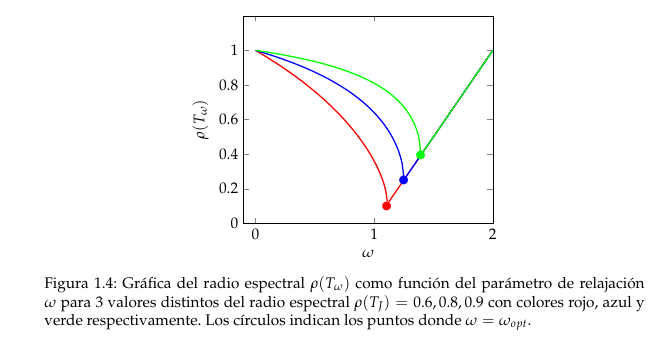

Para esto debe saber el radio espectral de $\rho(T_j)$.

**Ejemplo**: Halle la solucion aproximada de

\begin{eqnarray}
\begin{pmatrix}
5 & -2 & 3 \\
-3 & 8 & 1 \\
3 & -1 & -6
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2 \\ x_3
\end{pmatrix}
=
\begin{pmatrix}
-1 \\ 4 \\ 0
\end{pmatrix}
\end{eqnarray}

begin

In [ ]:
# implementacion del metodo de relajacion
import numpy as np
from numpy import linalg as la

def sor(A, b, omega, nmax, tol):
    n = len(b)
    x = np.zeros(n)
    xnew = np.zeros(n)

    k=0
    error = 10

    while (k<nmax) and (error>tol):
        for i in range(n):
            S = 0
            # xvalue
            xnew[i] = x[i]
            for j in range(n):
                if i!=j:
                    S = S + A[i,j]*x[j]
                    x[i] = (1-omega)*x[i] + (omega/A[i,i])*(b[i]-S)

        k += 1

        # calcule el error
        S = 0
        for j in range(n):
            S += (xnew[j]-x[j])**2
        error = np.sqrt(S)

        print("k = ", k, "error = ", error)

        print("   ",x)
    return x






In [ ]:
# prueba
A = np.array( [[5, -2, 3], [-3, 8, 1], [3, -1, -6]])

# vector b
b =np.array([-1, 4, 0])

nmax=100
tol=0.000000001
omega=1.2

x = sor(A, b, omega, nmax, tol)

k =  1 error =  0.48588004208446345
    [-0.192     0.41088  -0.174336]
k =  2 error =  0.3247733209132925
    [ 0.08361984  0.55268874 -0.07737367]
k =  3 error =  0.011945684251529243
    [ 0.07928631  0.54225667 -0.07348885]
k =  4 error =  0.008197827682403139
    [ 0.07230999  0.53874519 -0.0759798 ]
k =  5 error =  0.00034576046567947715
    [ 0.07247601  0.53903814 -0.07605834]
k =  6 error =  0.00020606667632183271
    [ 0.07265169  0.53912488 -0.0759945 ]
k =  7 error =  9.997282482305174e-06
    [ 0.07264606  0.53911675 -0.07599302]
k =  8 error =  5.166549977860715e-06
    [ 0.07264165  0.53911462 -0.07599465]
k =  9 error =  2.8689241521402217e-07
    [ 0.07264183  0.53911484 -0.07599468]
k =  10 error =  1.2919692772536896e-07
    [ 0.07264194  0.53911489 -0.07599463]
k =  11 error =  8.153265231022466e-09
    [ 0.07264193  0.53911489 -0.07599463]
k =  12 error =  3.2220421380322968e-09
    [ 0.07264193  0.53911489 -0.07599464]
k =  13 error =  2.2940987793194972e-10
    [

In [ ]:
# probemos con linalg
la.solve(A,b) # no se?


array([ 0.04850746,  0.5261194 , -0.06343284])

## metodo de Jacobi con pesos.
Este es el correspondiente SOR pero usando Jacobi en vez de Gauss-Seidel.


\begin{eqnarray}
    \bmy &=& (1 - \omega) \bmx_k + \omega T_J(\bmx_k)  \\
    &=& (1 - \omega) \bmx_k - \omega D^{-1}(L + U) \bmx + \omega D^{-1} \bmb
\end{eqnarray}
hacemos $\bmy=\bmx_{k+1}$

\begin{eqnarray}
    \bmx_{k+1} &=& (1 - \omega) \bmx_k + \omega T_J(\bmx_k)  \\
    &=& (1 - \omega) \bmx_k - \omega D^{-1}(L + U) \bmx + \omega D^{-1} \bmb
\end{eqnarray}

Gilbert Strang sugiere usar $\omega = 2/3 < 1$.
